    Nama  : Muhammad Iqbal Perdana
    NIM   : 09011281722057
    Kelas : SK5A
    MK    : Kecerdasan Buatan (A.I.)
    Dosen : Prof. Dr. Ir. Siti Nurmaini, M.T.

# Asteroid Classification using Artificial Neural Network

Bagian pertama, import library dan sub-librarynya Numpy, Pandas, Matplotlib, Seaborn, Keras, dan Scikit-Learn

In [1]:
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Import dataset yang akan diproses dalam preprocessing

In [2]:
df = pd.read_csv('C:/Users/8Ball270/Downloads/nasa-asteroids-classification/nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


Melihat informasi mengenai isi dataset yang bersangkutan untuk melihat jumlah isi dan tipe data setiap kolom yang sudah tertera namanya

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

Membuat variabel dataframe baru (df_1) untuk memproses penghilangan kolom-kolom yang tidak perlu dari dataframe utama (df) dan menjadikan dataframe baru dengan variabel df_1

In [4]:
df_1 = df.drop(columns=["Neo Reference ID", "Name", "Close Approach Date", "Orbiting Body", "Orbit Determination Date", "Orbit Uncertainity", "Equinox"])
df_1.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


Bagian preprocessing dibawah merupakan proses label encoder menjadikan angkanya lebih mudah untuk diolah, maka dataframe diatas (df_1) yang sudah diolah dengan label encoder menjadi dataframe baru dengan variabel df_2

In [5]:
enc = LabelEncoder()
df_2 = df_1.apply(enc.fit_transform)
df_2.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,104,164,164,164,164,164,164,164,164,0,...,1153,3245,2059,1569,541,2138,3037,2664,1632,1
1,92,176,176,176,176,176,176,176,176,0,...,3320,1436,1132,1152,3193,1336,966,1758,2559,0
2,75,193,193,193,193,193,193,193,193,1,...,749,2796,2171,2289,2513,2097,2806,2934,1520,1
3,235,33,33,33,33,33,33,33,33,2,...,1532,654,1636,2520,173,1404,1497,787,2055,0
4,104,164,164,164,164,164,164,164,164,2,...,2575,923,1527,2418,1562,1303,1026,1426,2164,1


Melihat informasi mengenai isi dataset df_2 untuk melihat jumlah isi dan tipe data setiap kolom yang sudah tertera namanya

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 33 columns):
Absolute Magnitude              4687 non-null int64
Est Dia in KM(min)              4687 non-null int64
Est Dia in KM(max)              4687 non-null int64
Est Dia in M(min)               4687 non-null int64
Est Dia in M(max)               4687 non-null int64
Est Dia in Miles(min)           4687 non-null int64
Est Dia in Miles(max)           4687 non-null int64
Est Dia in Feet(min)            4687 non-null int64
Est Dia in Feet(max)            4687 non-null int64
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null int64
Relative Velocity km per hr     4687 non-null int64
Miles per hour                  4687 non-null int64
Miss Dist.(Astronomical)        4687 non-null int64
Miss Dist.(lunar)               4687 non-null int64
Miss Dist.(kilometers)          4687 non-null int64
Miss Dist.(miles)               4687 non-null int64
Orbit ID 

Fungsi ini digunakan untuk melihat berapa jumlah baris dan jumlah kolom pada dataframe yang sudah diolah (df_2)

In [7]:
df_2.shape

(4687, 33)

Fungsi ini digunakan untuk melihat banyaknya isi dari salah satu kolom tersebut

In [8]:
df_2.Hazardous.value_counts()

0    3932
1     755
Name: Hazardous, dtype: int64

Jika label kolomnya menggunakan spasi, maka digunakan kurung siku dan tanda petik. Disarankan menggunakan nama label untuk kolomnya tanpa spasi agar syntaxnya seperti yang diatas ("df_2.Hazardous.value_counts()")

In [9]:
df_2['Absolute Magnitude'].value_counts()

91     84
85     84
89     76
104    73
80     71
       ..
229     1
221     1
209     1
205     1
0       1
Name: Absolute Magnitude, Length: 269, dtype: int64

pendefinisian variabel x dan y

In [10]:
x = np.array(df_2.ix[:, 0:32])
y = np.array(df_2.ix[:, 32])

C:\Users\8Ball270\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\8Ball270\Anaconda3\envs\tensorflow-sessions\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\8Ball270\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentati

mendeskripsi isi dataframe yang digunakan untuk melihat jumlah, rata-rata, maksimal, minimal, dan sebagainya

In [11]:
df_2.describe()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,120.337529,147.662471,147.662471,147.662471,147.662471,147.662471,147.662471,147.662471,147.662471,442.498613,...,1854.651163,1834.113505,1676.884361,1736.378280,1846.204395,1687.447408,1874.314700,1862.514188,2014.115639,0.161084
std,60.378024,60.378024,60.378024,60.378024,60.378024,60.378024,60.378024,60.378024,60.378024,224.846778,...,1071.749891,1067.536800,1073.408458,1057.759595,1068.235512,1069.314527,1024.024202,1050.312378,1073.408458,0.367647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,255.000000,...,918.500000,906.500000,730.000000,799.000000,925.500000,757.000000,1032.500000,966.500000,1097.500000,0.000000
50%,110.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,468.000000,...,1883.000000,1835.000000,1577.000000,1686.000000,1856.000000,1590.000000,1899.000000,1872.000000,2114.000000,0.000000
75%,163.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,642.000000,...,2789.500000,2754.500000,2593.500000,2621.500000,2773.500000,2595.500000,2730.500000,2770.000000,2961.000000,0.000000
max,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,776.000000,...,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000,1.000000


Melihat grafik perbandingan seberapa banyak asteroid yang berbahaya udaranya

In [12]:
true = df_2[df_2.Hazardous==1]
false = df_2[df_2.Hazardous==0]

Text(0, 0.5, 'Frequency')

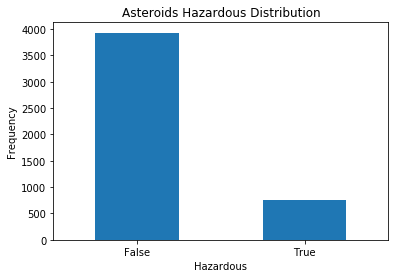

In [13]:
hazardous = ['False','True']
classes = pd.value_counts(df_2['Hazardous'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Asteroids Hazardous Distribution")
plt.xticks(range(2), hazardous)
plt.xlabel("Hazardous")
plt.ylabel("Frequency")

menampilkan grafik-grafik dari setiap kolom yang bersangkutan

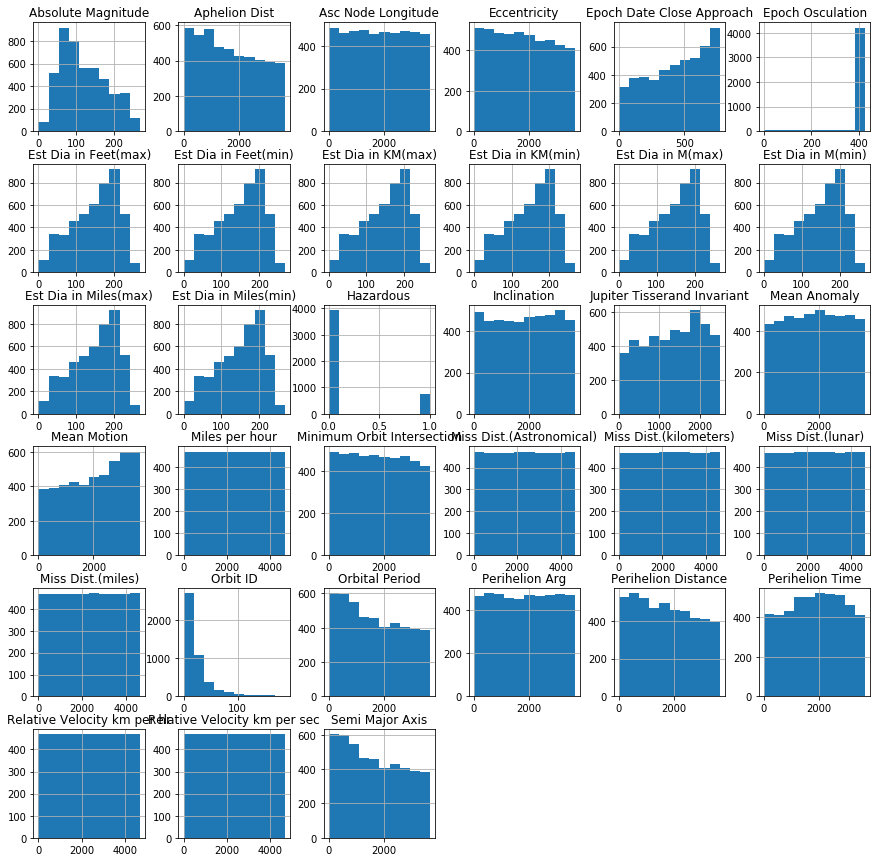

In [14]:
df_2.hist(figsize=(15,15))
plt.show()

Absolute Magnitude                 AxesSubplot(0.125,0.821923;0.168478x0.0580769)
Est Dia in KM(min)              AxesSubplot(0.327174,0.821923;0.168478x0.0580769)
Est Dia in KM(max)              AxesSubplot(0.529348,0.821923;0.168478x0.0580769)
Est Dia in M(min)               AxesSubplot(0.731522,0.821923;0.168478x0.0580769)
Est Dia in M(max)                  AxesSubplot(0.125,0.752231;0.168478x0.0580769)
Est Dia in Miles(min)           AxesSubplot(0.327174,0.752231;0.168478x0.0580769)
Est Dia in Miles(max)           AxesSubplot(0.529348,0.752231;0.168478x0.0580769)
Est Dia in Feet(min)            AxesSubplot(0.731522,0.752231;0.168478x0.0580769)
Est Dia in Feet(max)               AxesSubplot(0.125,0.682538;0.168478x0.0580769)
Epoch Date Close Approach       AxesSubplot(0.327174,0.682538;0.168478x0.0580769)
Relative Velocity km per sec    AxesSubplot(0.529348,0.682538;0.168478x0.0580769)
Relative Velocity km per hr     AxesSubplot(0.731522,0.682538;0.168478x0.0580769)
Miles per hour  

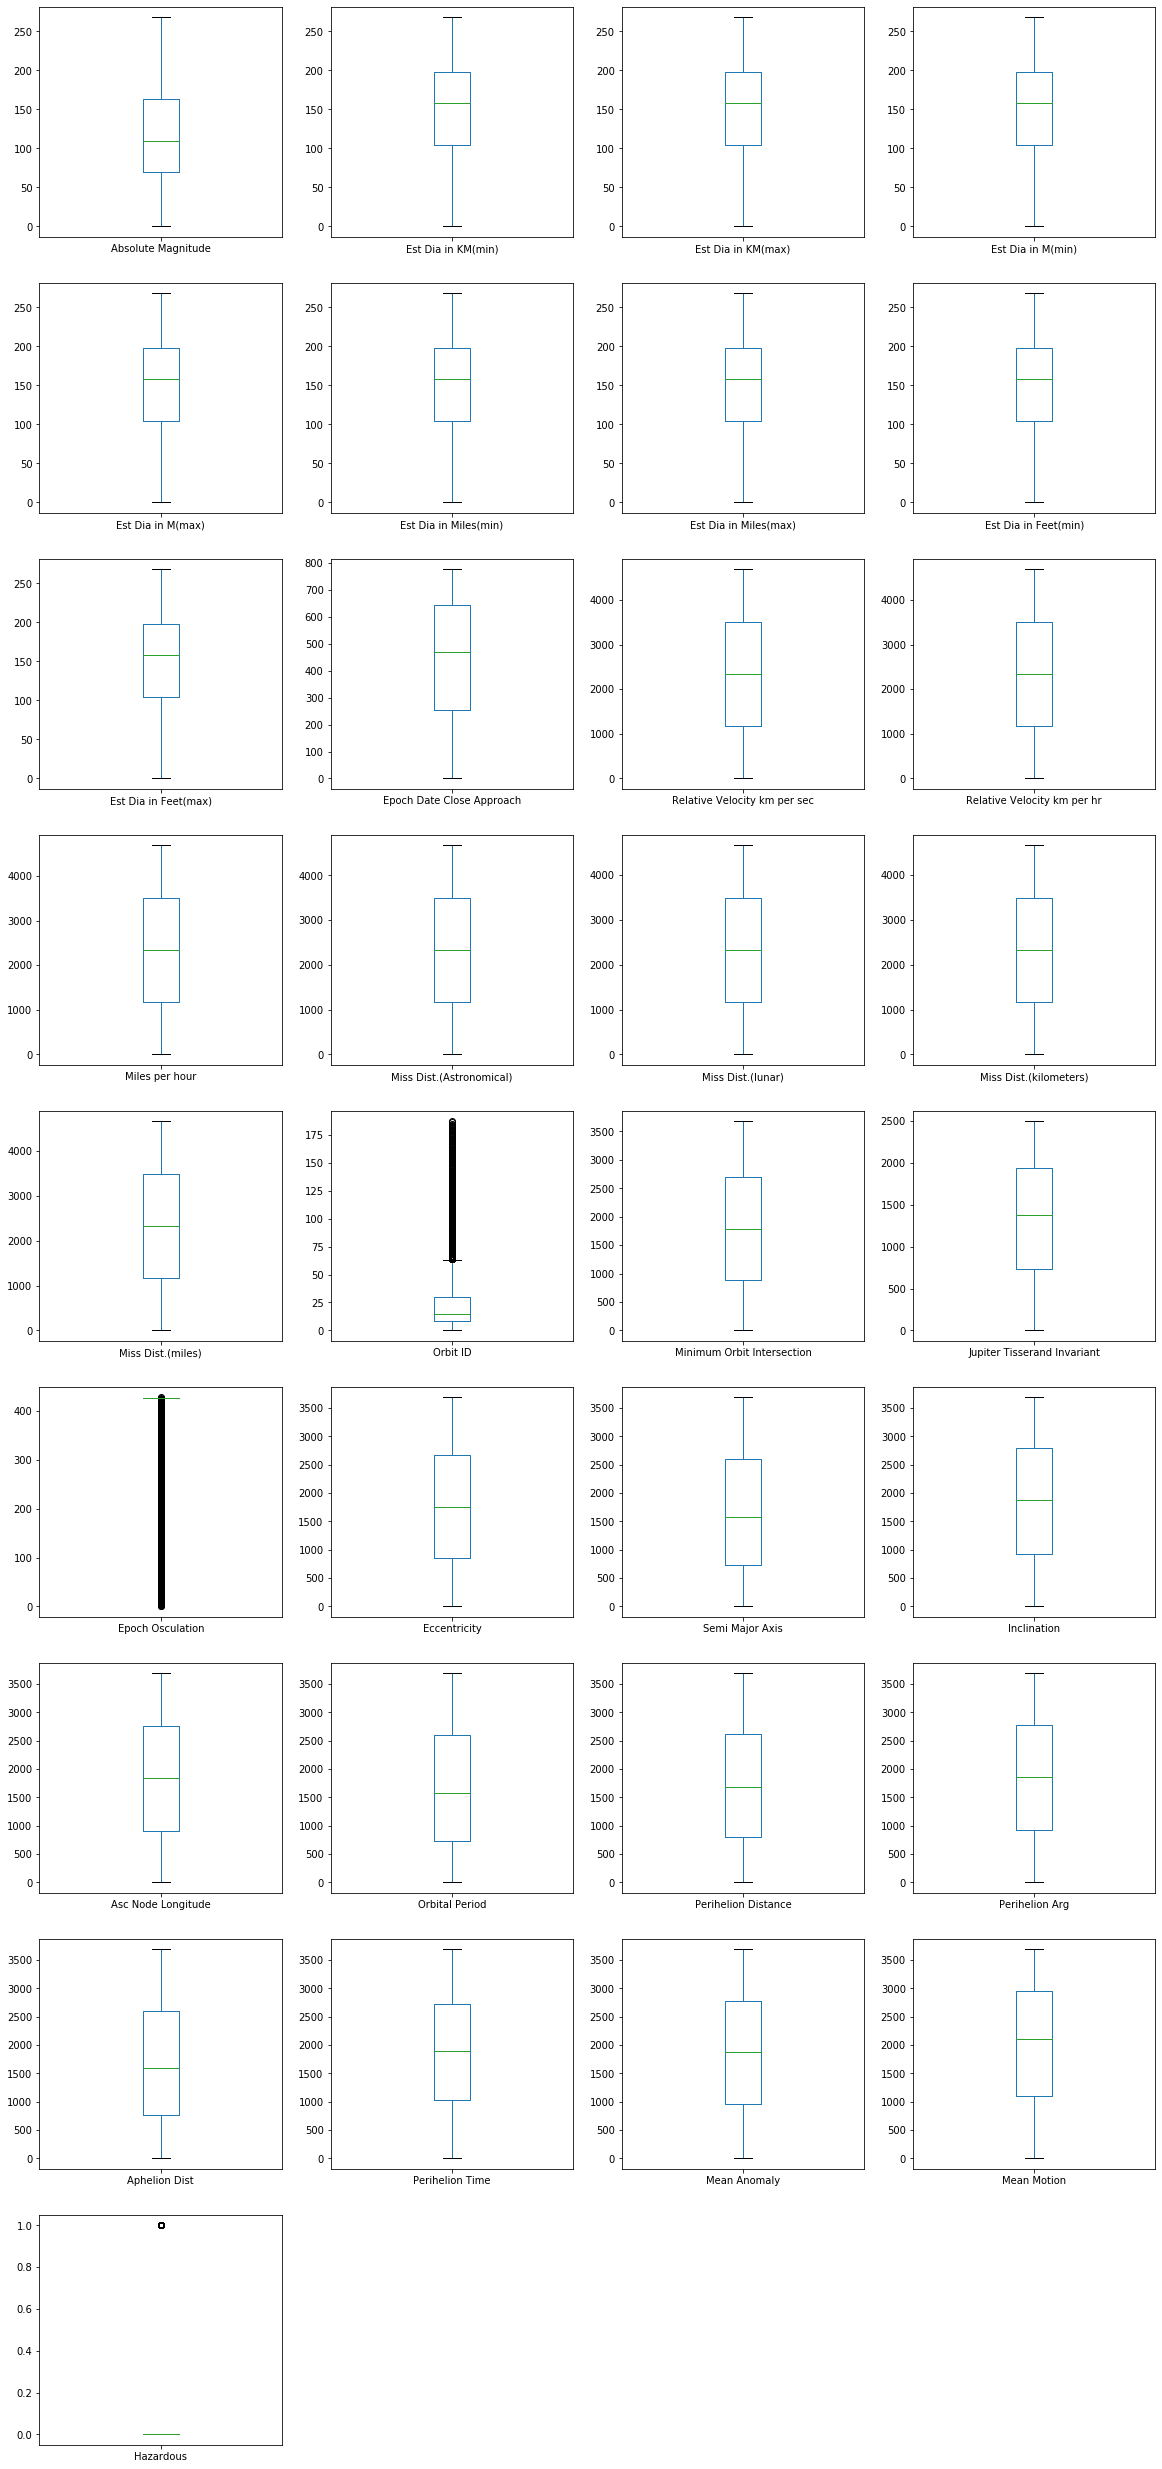

In [15]:
df_2.plot(kind='box', subplots=True, layout=(11,4), sharex=False, sharey=False, figsize=(20,55))

fungsi untuk penskalaan maksimum dan minimum

In [16]:
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(x)
feature_scaled.shape

(4687, 32)

In [17]:
print(y)

[1 0 1 ... 0 0 0]


Pembagian x dan y yang mana ada trainer dan ada juga tester, tester diberi ukuran sebesar 0.2

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

pendeklarasian model ANN untuk menentukan berapa banyak input, hidden layer, dan output

In [19]:
model = Sequential()
model.add(Dense(units= 50, input_dim= 32, activation='relu'))
model.add(Dense(units= 50, activation='relu'))
model.add(Dense(units= 3, activation='sigmoid'))

kemudian menentukan optimizer adam sebesar 0.01, loss, dan metrics sebelum diproses untuk melihat akurasi

In [20]:
model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

setelah itu, ini adalah tahap untuk training dengan menentukan batch size dan banyaknya epochs

In [21]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3749 samples, validate on 938 samples
Epoch 1/20





3749/3749 [==============================] - 5s 1ms/step - loss: 3.2980 - acc: 0.8381 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 2/20
3749/3749 [==============================] - 1s 231us/step - loss: 3.2770 - acc: 0.8397 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 3/20
3749/3749 [==============================] - 1s 213us/step - loss: 3.2770 - acc: 0.8397 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 4/20
3749/3749 [==============================] - 1s 262us/step - loss: 3.2770 - acc: 0.8397 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 5/20
3749/3749 [==============================] - 1s 218us/step - loss: 3.2770 - acc: 0.8397 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 6/20
3749/3749 [==============================] - 1s 196us/step - loss: 3.2770 - acc: 0.8397 - val_loss: 3.3394 - val_acc: 0.8358
Epoch 7/20
3749/3749 [===============

setelah tahap training, kemudian ada tahap testing dan melihat berapa besar akurasi yang didapat

In [22]:
acc_testing  = model.evaluate(x_test, y_test) 
print('\nAccuracy is', acc_testing[1])

938/938 [==============================] - 0s 160us/step

Accuracy is 0.8358208953952992


Plotting perbandingan akurasi training data dan testing data

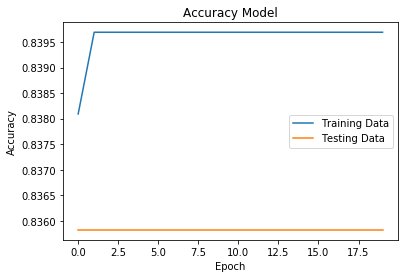

In [23]:
plt.plot(acc_training.history['acc'])
plt.plot(acc_training.history['val_acc'])
plt.title('Accuracy Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()

Plotting perbandingan loss training data dan testing data

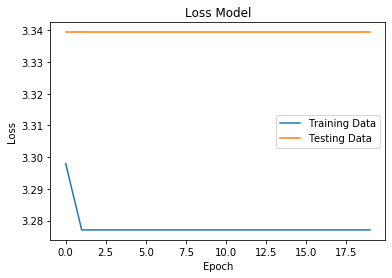

In [24]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Testing Data'], loc='center right')
plt.show()

menambahkan perdiction agar dapat membuat confusion matrix dan mendeklarasikan variabel-variabel yang mengambil nilai dari hasil proses confusion matrix

In [25]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

menampilkan apa isi dari sebuah confusion matrix yang sudah dibuat

In [26]:
print("Confussion matrix:\n",cm)

Confussion matrix:
 [[784   0]
 [154   0]]


kemudian proses melakukan perhitungan, salah satunya menghitung akurasi dengan menggunakan angka-angka dari confusion matrix

In [27]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
sensitivity = tp/(tp + fn)

Menampilkan hasil perhitungan diatas

In [28]:
print("precesion   : ",precision)
print("recall      : ",recall)
print("F1          : ",f1)
print("sensitivity : ",sensitivity)
print("accuracy    : ",accuracy)

precesion   :  1.0
recall      :  0.835820895522388
F1          :  0.9105691056910569
sensitivity :  0.835820895522388
accuracy    :  0.835820895522388


Datasets source : https://www.kaggle.com/shrutimehta/nasa-asteroids-classification